___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cufflinks as cf
import plotly.offline

cf.go_offline()
cf.set_config_file(offline=True, world_readable=False)

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

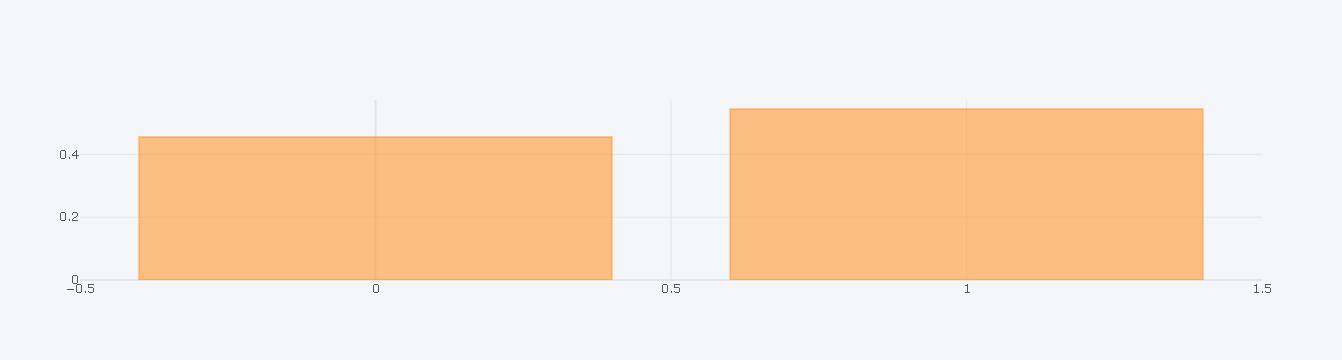

In [5]:
df.target.value_counts(normalize=True).iplot(kind="bar")

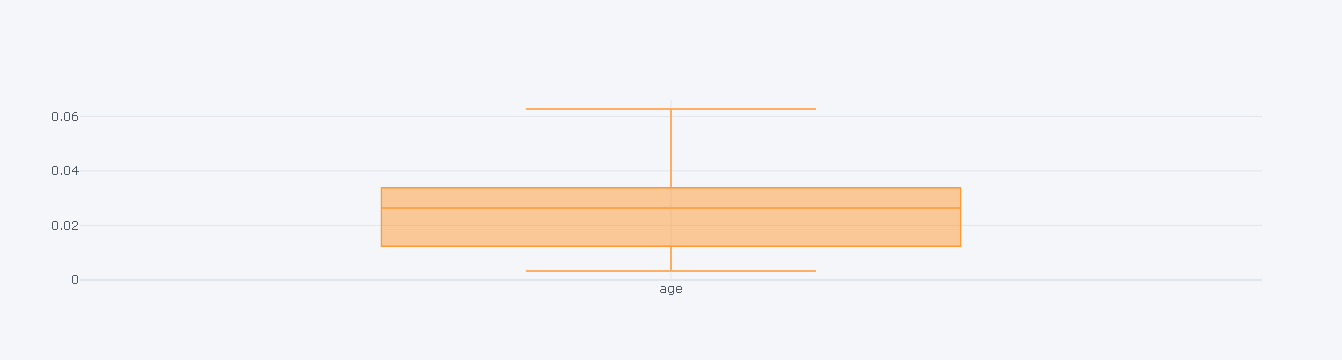

In [6]:
df.age.value_counts(normalize=True).iplot(kind="box")

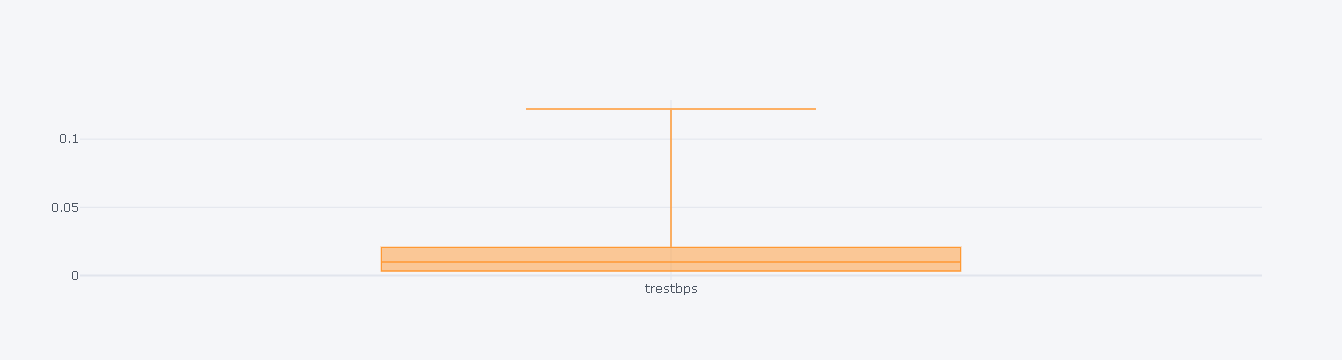

In [7]:
df.trestbps.value_counts(normalize=True).iplot(kind="box")

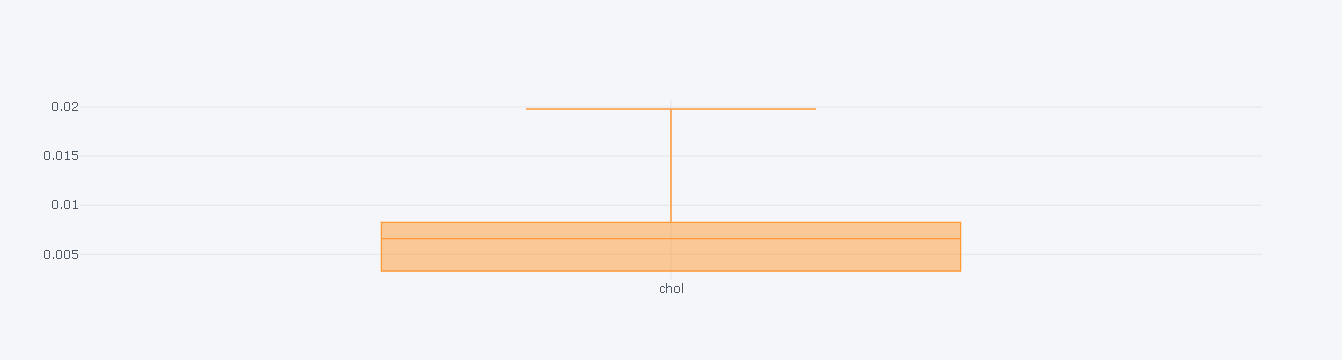

In [8]:
df.chol.value_counts(normalize=True).iplot(kind = "box")

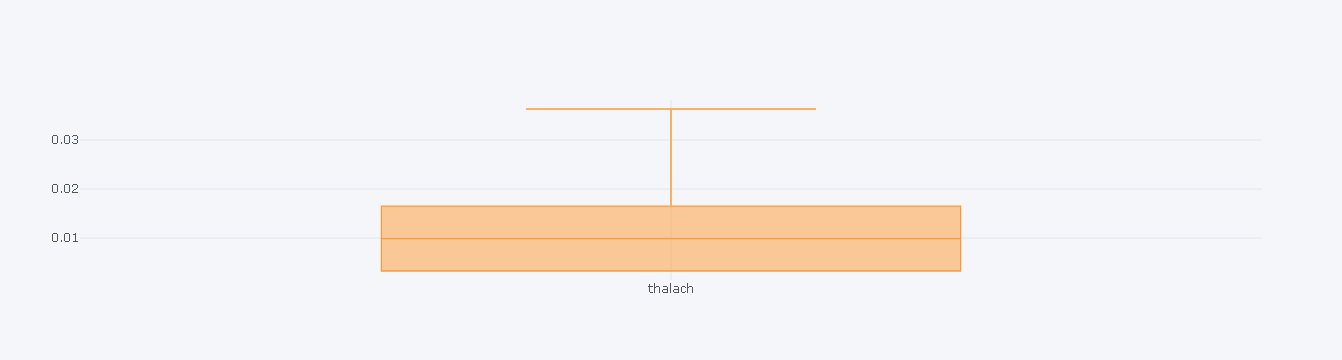

In [9]:
df.thalach.value_counts(normalize=True).iplot(kind = "box")

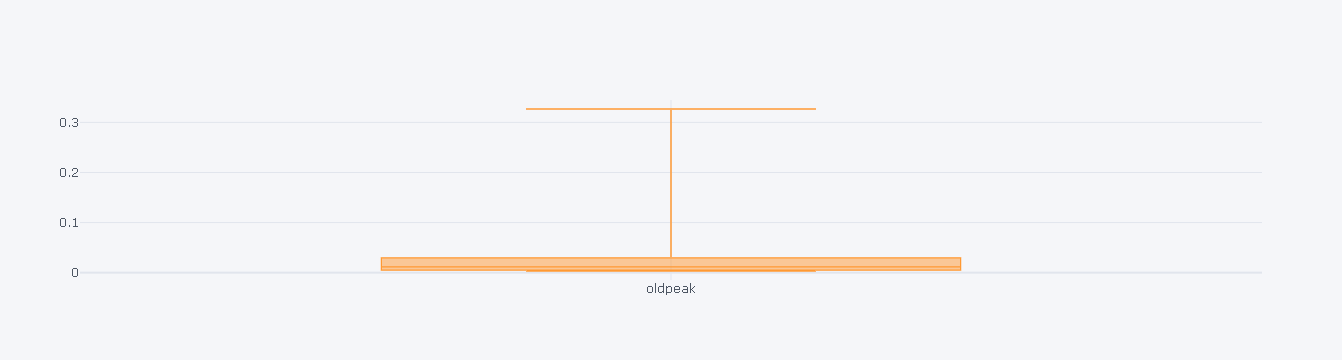

In [10]:
df.oldpeak.value_counts(normalize=True).iplot(kind = "box")

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [12]:
# index = 0
# plt.figure(figsize = (20,20) )
# for feature in df.columns:
#     if feature != "target":
#         index += 1
#         plt.subplot(3, 3, index)
#         sns.boxplot(x = 'target', y = feature, data = df)

<AxesSubplot:>

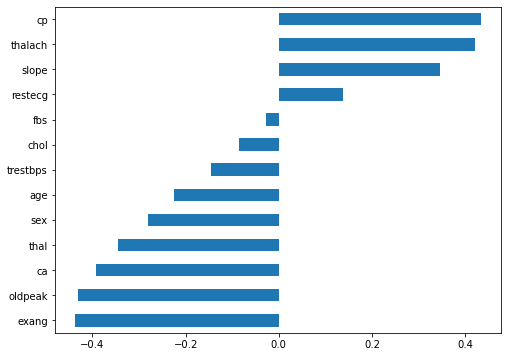

In [13]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["target"].drop("target").sort_values().plot.barh()

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [57]:
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]

In [63]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts())
    print()

sex
1    207
0     96
Name: sex, dtype: int64

cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

fbs
0    258
1     45
Name: fbs, dtype: int64

restecg
1    152
0    147
2      4
Name: restecg, dtype: int64

exang
0    204
1     99
Name: exang, dtype: int64

slope
2    142
1    140
0     21
Name: slope, dtype: int64

ca
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

thal
2    166
3    117
1     18
0      2
Name: thal, dtype: int64

target
1    165
0    138
Name: target, dtype: int64



# Data Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import cross_validate

In [18]:
X = df.drop(columns = "target")
y = df.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [22]:
log_model=LogisticRegression(class_weight="balanced")
log_model

LogisticRegression(class_weight='balanced')

In [23]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)

In [24]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [25]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
183,58,1,2,112,230,0,0,165,0,2.500,1,1,3,0,0,0.431
240,70,1,2,160,269,0,1,112,1,2.900,1,1,3,0,0,0.096
39,65,0,2,160,360,0,0,151,0,0.800,2,0,2,1,1,0.885
282,59,1,2,126,218,1,1,134,0,2.200,1,1,1,0,1,0.717
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1,1,0.932
255,45,1,0,142,309,0,0,147,1,0.000,1,3,3,0,0,0.031
41,48,1,1,130,245,0,0,180,0,0.200,1,0,2,1,1,0.678
157,35,1,1,122,192,0,1,174,0,0.000,2,0,2,1,1,0.876
153,66,0,2,146,278,0,0,152,0,0.000,1,1,2,1,1,0.783
12,49,1,1,130,266,0,1,171,0,0.600,2,0,2,1,1,0.805


* firstly used without (class_weight = "balanced") values. recall = 0.74, 0.93

In [26]:
# without (class_weight = "balanced") values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24  7]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



* secondly used without (class_weight = "balanced") values. seen that recall values became low (recall = 0.81, 0.93). accept the (class_weight = "balanced").

In [27]:
# with (class_weight = "balanced") values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24  7]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# Cross Validate

* seen that after cv, recall value was 0.829

In [28]:
model = LogisticRegression(class_weight="balanced")

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores
df_scores.mean()[2:]

test_accuracy    0.814
test_precision   0.831
test_recall      0.852
test_f1          0.838
dtype: float64

### Finding Best Threshold

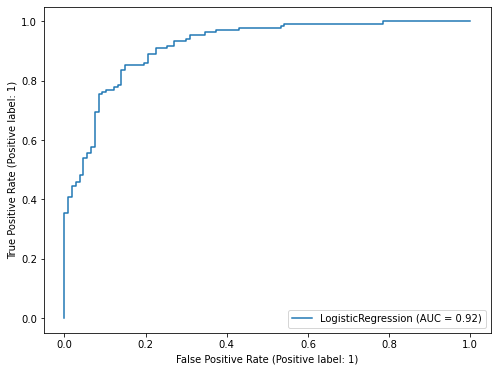

In [29]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
plot_roc_curve(log_model, X_train_scaled, y_train);

In [30]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9321123103786115

In [31]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [32]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5610005707188364

In [33]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0,0,0.023
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1,1,0.799
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1,1,0.640
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1,1,0.932
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0,0,0.045


In [34]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [35]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba,pred2
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0,0,0.023,0
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1,1,0.799,1
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1,1,0.640,1
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1,1,0.932,1
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0,0,0.045,0


In [36]:
y_pred2 = test_data["pred2"]

In [37]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[26  5]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Implement KNN and Evaluate

In [38]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [39]:
# sns.pairplot(data = df, hue = "target", height = 4, aspect = 1)

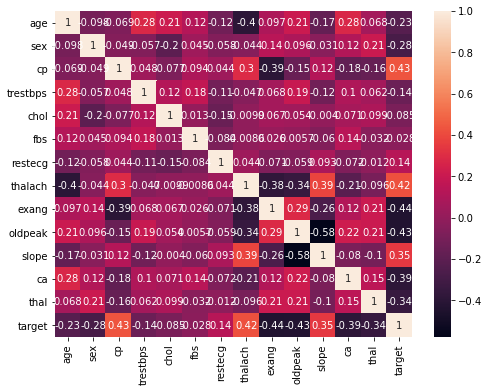

In [40]:
sns.heatmap(df.corr(), annot=True);

In [41]:
X = df.drop('target',axis=1)
y = df['target']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
scaler = MinMaxScaler()

In [44]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [47]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred = knn_model.predict(scaled_X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [49]:
y_pred_proba = knn_model.predict_proba(scaled_X_test)

In [50]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.000,0.000
1,0.400,0.600
2,0.000,1.000
3,0.800,0.200
4,0.200,0.800
...,...,...
86,1.000,0.000
87,0.000,1.000
88,0.000,1.000
89,0.400,0.600


In [51]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [52]:
pd.DataFrame(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
164,1,0,0.400,0.600
143,1,1,1.000,0.000
66,1,1,0.800,0.200
249,0,0,0.200,0.800
118,1,1,1.000,0.000
228,0,1,0.600,0.400
287,0,1,1.000,0.000
144,1,1,0.800,0.200
158,1,0,0.400,0.600
59,1,1,0.800,0.200


# Implement SVM and Evaluate

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [54]:
confusion_matrix(y_test, y_pred)

array([[33,  8],
       [10, 40]], dtype=int64)

In [55]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  8]
 [10 40]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 